In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import numpy as np
from skimage import io
from IPython import display
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(color_codes=True)
sample_submission_url = 'https://raw.githubusercontent.com/AngelaBurgaleta/Entregas_93000822/main/Challenge1/datasets/sample_submission.csv'
test_nolabel_url= "https://raw.githubusercontent.com/AngelaBurgaleta/Entregas_93000822/main/Challenge1/datasets/test_nolabel.csv/test_nolabel.csv"
train_url = 'https://raw.githubusercontent.com/AngelaBurgaleta/Entregas_93000822/main/Challenge1/datasets/train.csv/train.csv'

sample_submission = pd.read_csv(sample_submission_url)
test_nolabel = pd.read_csv(test_nolabel_url)
train = pd.read_csv(train_url)


 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#Description and data fields

The data consists of a collection of companies that ask for a loan. Each instance has a number of data describing the company and its petition, and an annotation indicating whether the loan has been approved. Data is stored in plain CSV files. The first line of each file is the column name.

The task is to predict whether a certain client will or not abandon the company. That is, to predict the Accept attribute.


*  id # Text # Identifier of the data instance
*  LoanNr_ChkDgt # Text # Identifier of the loan petition
*  Name # Text # Borrower name
*  City # Text # Borrower city
*  State # Text # Borrower state
*  Bank # Text # Bank name
*  BankState # Text # Bank state
*  ApprovalDate # Date/Time # Date SBA commitment issued
*  ApprovalFY # Text # Fiscal year of commitment
*  NoEmp # Number # Number of business employees
*  NewExist # Text # 1 = Existing business, 2 = New business
*  CreateJob # Number # Number of jobs created
*  RetainedJob # Number # Number of jobs retained
*  FranchiseCode # Text # Franchise code, (00000 or 00001) = No franchise
*  UrbanRural # Text # 1 = Urban, 2 = rural, 0 = undefined
*  RevLineCr # Text # Revolving line of credit: Y = Yes, N = No
*  LowDoc # Text # LowDoc Loan Program: Y = Yes, N = No
*  DisbursementDate # Date/Time # Disbursement date
*  DisbursementGross # Currency # Amount disbursed
*  BalanceGross # Currency # Gross amount outstanding
*  Accept # Text # Loan approval status. 0 = not approved, 1 = approved








#Exploration


In [ ]:
train.head()

,id,LoanNr_ChkDgt,Name,City,State,Bank,BankState,ApprovalDate,ApprovalFY,NoEmp,...,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,Accept
0,b353a0b461c,3354343008,"TOGETHER GARGOYLES, INC.",BROOKLYN,NY,JPMORGAN CHASE BANK NATL ASSOC,NY,21-Dec-88,1989,20,...,0,0,0,0,N,N,30-Apr-89,"$350,000.00",$0.00,1
1,cca24bbcc48,2349745003,LAWRENCE K. ALTHISER DBA LARRY,HARTWICK,NY,CITIZENS BANK NATL ASSOC,RI,23-Mar-07,2007,3,...,1,4,0,2,N,N,30-Apr-07,"$35,000.00",$0.00,1
2,e60644381ce,6007284009,TAAMEER CONSTRUCTION INC,BROOKLYN (BOROUGH OF NEW YORK),NY,JPMORGAN CHASE BANK NATL ASSOC,IL,9-Jan-03,2003,5,...,0,5,1,1,0,N,31-Jan-03,"$50,000.00",$0.00,1
3,ffca41a2760,6047703002,"CENTRAL CONTROL SYSTEMS, INC.",SYRACUSE,NY,MANUFACTURERS & TRADERS TR CO,NY,10-Nov-93,1994,25,...,0,0,1,0,N,N,31-Jan-94,"$190,000.00",$0.00,1
4,79e48255003,6590164004,METRO SALON,ROCHESTER,NY,MANUFACTURERS & TRADERS TR CO,NY,14-Aug-03,2003,6,...,0,0,1,1,0,Y,30-Sep-03,"$30,000.00",$0.00,1


In [ ]:
train.shape

(40385, 21)

In [ ]:
train['Accept'].unique()

array([1, 0])

In [ ]:
train['DisbursementGross'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0          $350,000.00 
1           $35,000.00 
2           $50,000.00 
3          $190,000.00 
4           $30,000.00 
              ...      
40380       $50,000.00 
40381    $1,666,600.00 
40382       $25,000.00 
40383       $73,363.00 
40384       $50,000.00 
Name: DisbursementGross, Length: 40385, dtype: object>

In [ ]:
#valores nulos media
train.isna().mean()

id                   0.000000
LoanNr_ChkDgt        0.000000
Name                 0.000074
City                 0.000000
State                0.000000
Bank                 0.001114
BankState            0.001164
ApprovalDate         0.000000
ApprovalFY           0.000000
NoEmp                0.000000
NewExist             0.000173
CreateJob            0.000000
RetainedJob          0.000000
FranchiseCode        0.000000
UrbanRural           0.000000
RevLineCr            0.003343
LowDoc               0.001362
DisbursementDate     0.003244
DisbursementGross    0.000000
BalanceGross         0.000000
Accept               0.000000
dtype: float64

In [ ]:
#valores nulos suma
train.isna().sum()

id                         0
LoanNr_ChkDgt              0
Name                       0
City                       0
State                      0
Bank                       0
BankState                  0
ApprovalDate               0
ApprovalFY                 0
NoEmp                      0
NewExist                   0
CreateJob                  0
RetainedJob                0
FranchiseCode              0
UrbanRural                 0
RevLineCr                  0
LowDoc                     0
DisbursementDate           0
DisbursementGross          0
BalanceGross               0
Accept                     0
DisbursementGrossInt       0
TramosDisbursementGross    0
dtype: int64

In [ ]:
bancos = train.groupby(['Bank']).size()
bancos.value_counts()

1       70
2       29
4       21
3       17
5       11
        ..
54       1
78       1
2976     1
107      1
52       1
Length: 93, dtype: int64

In [ ]:
train['BankState'].value_counts()

NY    19924
IL     5930
RI     4370
NC     2592
VA     1822
CA     1013
NJ      872
SD      836
CT      755
OH      722
DE      460
TX      327
SC      228
PA      144
PR       60
MA       51
NV       43
UT       37
VT       23
OR       18
FL       14
ME       14
MN       13
NH       13
WI       12
DC       12
MD        9
MO        5
TN        5
LA        4
CO        3
GA        2
KY        1
AL        1
WA        1
NM        1
NE        1
Name: BankState, dtype: int64

In [ ]:
train.shape

(40385, 21)

In [ ]:
train.columns

Index(['id', 'LoanNr_ChkDgt', 'Name', 'City', 'State', 'Bank', 'BankState',
       'ApprovalDate', 'ApprovalFY', 'NoEmp', 'NewExist', 'CreateJob',
       'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc',
       'DisbursementDate', 'DisbursementGross', 'BalanceGross', 'Accept',
       'DisbursementGrossInt', 'TramosDisbursementGross'],
      dtype='object')

In [ ]:
train['FranchiseCode'].unique()

array([0, 1, 2])

In [ ]:
train['LowDoc'].value_counts()

N    36575
Y     3704
C       16
0       13
A       11
S       10
R        1
Name: LowDoc, dtype: int64

In [ ]:
train['ApprovalFY'].unique()

array(['1989', '2007', '2003', '1994', '2011', '1996', '2000', '2004',
       '1998', '1999', '2001', '1997', '1993', '1987', '2002', '2005',
       '2008', '2006', '2012', '1988', '1992', '2009', '1990', '1985',
       '1995', '2010', '1979', '1991', '2013', '1984', '1986', '1978',
       '1983', '1974', '1980', '1982', '1976', '1971', '1981', '1973',
       '1977', '1972', '1975', '2014', '1970', '1976A', '1965', 1995,
       1999, 2007, 2008, 2004, 1991, 1997, 2005, 2003, 2001, 2006, 2002,
       1996, 1993, 1979, 2000, 1998, 2011, 1989, 1994, 2009, 2010, 1992,
       1990, 1987, 1984, 1983, 1986, 2013, 2012, 1988, 1980, 1981, 1977,
       1982, 2014, 1985, 1978, 1974, 1976], dtype=object)

#Limpieza de datos

*  id # Text # Identifier of the data instance 
*  LoanNr_ChkDgt # Text # Identifier of the loan petition
*  Name # Text # Borrower name
*  City # Text # Borrower city
*  State # Text # Borrower state
*  Bank # Text # Bank name
*  BankState # Text # Bank state
*  ApprovalDate # Date/Time # Date SBA commitment issued
*  ApprovalFY # Text # Fiscal year of commitment
*  NoEmp # Number # Number of business employees
*  NewExist # Text # 1 = Existing business, 2 = New business
*  CreateJob # Number # Number of jobs created
*  RetainedJob # Number # Number of jobs retained
*  FranchiseCode # Text # Franchise code, (00000 or 00001) = No franchise
*  UrbanRural # Text # 1 = Urban, 2 = rural, 0 = undefined
*  RevLineCr # Text # Revolving line of credit: Y = Yes, N = No
*  LowDoc # Text # LowDoc Loan Program: Y = Yes, N = No
*  DisbursementDate # Date/Time # Disbursement date
*  DisbursementGross # Currency # Amount disbursed
*  BalanceGross # Currency # Gross amount outstanding
*  Accept # Text # Loan approval status. 0 = not approved, 1 = approved

Los valores nulos se rellenarán con los valores más comunes
Ademas RevLineCr y LowDoc se codificarán con 0 y 1. Bank y BankState se convierte a int

train.isna().sum()

Name                   3

Bank                  45

BankState             47

NewExist               7

RevLineCr            135

LowDoc                55

DisbursementDate     131

dtype: int64

In [ ]:
print('Name', '\n'  ,train['Name'].value_counts() )
print('\n')
print('Bank', '\n'  ,train['Bank'].value_counts() )
print('\n')
print('BankState', '\n'  ,train['BankState'].value_counts() )
print('\n')
print('NewExist', '\n'  ,train['NewExist'].value_counts() )
print('\n')
print('RevLineCr', '\n'  ,train['RevLineCr'].value_counts() )
print('\n')
print('LowDoc', '\n'  ,train['LowDoc'].value_counts() )
print('\n')
print('DisbursementDate', '\n'  ,train['DisbursementDate'].value_counts() )

Name 
 SUBWAY                            72
DUNKIN DONUTS                     30
QUIZNO'S SUBS                     25
COLCHESTER HOLDINGS, INC.         14
QUIZNO'S                          14
                                  ..
Just For You Limousine,Inc.        1
SALON EAST                         1
D & J 71 FOOD CORP                 1
GOLDSMITH HARDWARE, HOUSEWARES     1
Miyaki, Inc.                       1
Name: Name, Length: 37615, dtype: int64


Bank 
 JPMORGAN CHASE BANK NATL ASSOC    6244
BANK OF AMERICA NATL ASSOC        6044
MANUFACTURERS & TRADERS TR CO     3805
HSBC BK USA NATL ASSOC            2976
FIRST NIAGARA BANK NATL ASSOC     2195
                                  ... 
FIRST AMERICANO FINAN CORP           1
FIRST REPUBLIC BANK                  1
FIRST NIAGARA FINAN GROUP INC        1
DELAWARE NATL BK OF DELHI            1
FIRST NATIONAL BANK OF OMAHA         1
Name: Bank, Length: 311, dtype: int64


BankState 
 NY    19924
IL     5930
RI     4370
NC     2592
VA     1

In [ ]:
##LIMPIEZA


train['Name'] = train['Name'].fillna('SUBWAY')

train['Bank'] = train['Bank'].fillna('JPMORGAN CHASE BANK NATL ASSOC')

train['BankState'] = train['BankState'].fillna('NY')

train['NewExist'] = train['NewExist'].fillna(1) #1 es que el negocio ya existe
train.loc[train['NewExist'] == 0, 'NewExist'] = 1

train['RevLineCr'] = train['RevLineCr'].fillna('N')  #Se puede definir el crédito revolving como una línea de crédito concedida por una entidad financiera a un cliente, con un límite establecido del que puede disponer durante un tiempo determinado
train['RevLineCr'].loc[(train['RevLineCr'] == '0')] = 'N' #interpreto el 0 como un no 
train['RevLineCr'].loc[(train['RevLineCr'] == 'T')] = 'Y' #interpreto el t como un true y se codifica a yes
#codificacion binaria
train['RevLineCr'].loc[(train['RevLineCr'] == 'N')] = 0 
train['RevLineCr'].loc[(train['RevLineCr'] == 'Y')] = 1 


train['LowDoc'] = train['LowDoc'].fillna('N')
train.loc[train["LowDoc"] == "C", "LowDoc"] = 'N'
train.loc[train["LowDoc"] == '0', "LowDoc"] = 'N'
train.loc[train["LowDoc"] == 'A', "LowDoc"] = 'N'
train.loc[train["LowDoc"] == "S", "LowDoc"] = 'N'
train.loc[train["LowDoc"] == "R", "LowDoc"] = 'N'

#codificacion binaria
train.loc[train["LowDoc"] == "N", "LowDoc"] = 0
train.loc[train["LowDoc"] == "Y", "LowDoc"] = 1

train['DisbursementDate'] = train['DisbursementDate'].fillna('31-Oct-05')

train.loc[train["ApprovalFY"] == "1976A", "ApprovalFY"] = 1976

#FranchiseCode : la información más importante que podemos extraer de este parámetro es si no hay franquicias (0), solo tienen una (1) o si tienen muchas, es este último caso cambiamos su valor a 2.
train.loc[(train['FranchiseCode'] != 0) & (train['FranchiseCode'] != 1), 'FranchiseCode'] = 2
train['FranchiseCode'] = train['FranchiseCode'].astype(np.int64)

#DisbursementGross: asociamos un nuevo valor numérico según el rango en el que está el dato.
def convertir_a_int(x):
    return int(float(x.replace('$', '').replace(' ', '').replace(',', '')))

train['DisbursementGrossInt'] = train['DisbursementGross'].apply(convertir_a_int)
train['DisbursementGrossSection'] = train['DisbursementGrossInt']
train.loc[train['DisbursementGrossInt'] >= 400000, 'DisbursementGrossSection'] = int(0)
train.loc[(train['DisbursementGrossInt'] < 400000) & (train['DisbursementGrossInt'] >= 150000), 'DisbursementGrossSection'] = int(1)
train.loc[(train['DisbursementGrossInt'] < 150000) & (train['DisbursementGrossInt'] >= 100000), 'DisbursementGrossSection'] = int(2)
train.loc[(train['DisbursementGrossInt'] < 100000) & (train['DisbursementGrossInt'] >= 70000), 'DisbursementGrossSection'] = int(3)
train.loc[(train['DisbursementGrossInt'] < 70000) & (train['DisbursementGrossInt'] >= 10000), 'DisbursementGrossSection'] = int(4)
train.loc[train['DisbursementGrossInt'] < 10000, 'DisbursementGrossSection'] = int(5)

#¿Hacer tramos de NoEmp?

#BankState y Bank lo asociamos a un indice
train['BankState'].fillna('NY', inplace=True)
index_S = train["BankState"].unique() #we assign an int to identify each bank state
for i in range (0, 37):
    
    train.loc[train["BankState"] == index_S[i] , "BankState"] = i
#train.head()
#train['BankState'].unique()

train['Bank'].fillna('NY', inplace=True)
index_S = train["Bank"].unique() #we assign an int to identify each bank 
for i in range (0, 311):
    
    train.loc[train["Bank"] == index_S[i] , "Bank"] = i
#train.head()
#train['Bank'].unique()






/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
#Conversión de fechas al final pasé
#APPROVAL DATE NUMBER DE MESES STRING A NUMERO
#!/usr/bin/env python
# -*- coding: utf-8 -*- 

# Guardamos todos los meses dentro de un arreglo
months = ['Jan',
        'Feb',
        'Mar',
        'Apr',
        'May',
        'Jun',
        'Jul',
        'Aug',
        'Sep',
        'Oct',
        'Nov',
        'Dec']

# Guardamos todas las fechas a convertir dentro de un arreglo
dates = train['ApprovalDate']
# Creamos un arreglo vacío para guardar las fechas ya transformadas
ApprovalDateNumber = []

# Creamos una función que nos devuelva el número de mes
# buscandolo por el nombre del mes
def getNumMonthByName(monthName):
    # Primero nos cercioramos de que el mes si esté en nuestro arreglo
    if(monthName in months):
        # Si el número de digitos de nuestro mes es '1'
        # le añadimos un 0 al principio (01 para enero, 02 para febrero, etc)
        if(len(str(months.index(monthName) + 1)) == 1):
            currentMonth = months.index(monthName) + 1
            return '0' + str(currentMonth)
        else:
            # Si no, lo retornamos tal cual
            return months.index(monthName) + 1
    else:
        return False

# Recorremos las fechas a convertir
for x in range(0, len(dates)):
    # Convertimos el string de la fecha a un arreglo donde
    # la posición 1 será el nombre del mes
    currentDateSplit = dates[x].split('-')

    # Transformamos nuestro mes
    newMonth = str(getNumMonthByName(currentDateSplit[1]))

    # Concatenamos y agregamos al arreglo las nuevas fechas transformadas
    ApprovalDateNumber.append(str(currentDateSplit[0]) + "-" + newMonth + "-" + str(currentDateSplit[2]))

print(ApprovalDateNumber)

train.insert(1, "ApprovalDateNumber", ApprovalDateNumber, allow_duplicates=True)

['21-12-88', '23-03-07', '9-01-03', '10-11-93', '14-08-03', '19-05-11', '14-08-96', '9-11-99', '8-04-04', '10-07-98', '30-03-04', '15-10-98', '12-09-01', '16-09-97', '29-10-93', '12-12-02', '8-07-04', '15-11-06', '1-12-97', '5-05-04', '28-04-93', '14-11-00', '25-11-88', '18-04-94', '24-07-07', '29-09-87', '2-08-07', '16-04-03', '3-07-02', '13-05-05', '29-09-93', '1-10-07', '8-06-94', '22-11-95', '5-03-97', '23-09-99', '22-09-97', '28-06-05', '13-09-96', '31-10-00', '13-04-06', '5-03-12', '22-04-88', '18-12-91', '30-10-01', '13-07-06', '23-04-11', '20-06-96', '12-06-97', '19-05-97', '1-12-04', '4-10-01', '30-06-89', '29-09-06', '5-06-06', '6-12-05', '19-09-05', '9-04-03', '13-04-94', '5-01-99', '9-06-05', '8-08-07', '18-08-04', '27-07-07', '13-10-06', '23-03-04', '30-01-96', '3-01-05', '22-09-97', '23-06-11', '30-03-07', '25-07-08', '6-01-93', '18-09-92', '12-04-05', '7-03-00', '4-09-92', '13-08-04', '17-11-00', '29-01-07', '3-08-00', '29-03-05', '9-06-06', '19-06-92', '15-07-06', '28-0

In [ ]:
#ApprovalDateNumber a timestamp (base de codigo)
#!/usr/bin/env python
# -*- coding: utf-8 -*- 
import datetime
import time

s= "01-12-88"
t = "01-12-1998"

print(datetime.datetime.strptime(s, "%d-%m-%Y").timestamp())
print(datetime.datetime.strptime(t, "%d-%m-%Y").timestamp())

#a menor numero más atrás en el tiempo 


ValueError: ignored

In [ ]:
#ApprovalDateNumber a timestamp sudo de lo de los años
#!/usr/bin/env python
# -*- coding: utf-8 -*- 
import datetime
import time


train['ApprovalDateNumber'] = train['ApprovalDateNumber'].map(lambda x: datetime.datetime.strptime(x,'%d-%m-%Y').timestamp())




ValueError: ignored

In [ ]:
train.columns

Index(['id', 'ApprovalDateNumber', 'LoanNr_ChkDgt', 'Name', 'City', 'State',
       'Bank', 'BankState', 'ApprovalDate', 'ApprovalFY', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'DisbursementDate', 'DisbursementGross', 'BalanceGross',
       'Accept', 'DisbursementGrossInt', 'DisbursementGrossSection'],
      dtype='object')

###Drop Columns 

In [ ]:
train_drop = train.drop(['id', 'LoanNr_ChkDgt', 'Name', 'State', 'BalanceGross', 'DisbursementGross', 'DisbursementGrossInt'], axis=1)

In [ ]:
train_drop.columns

Index(['City', 'Bank', 'BankState', 'ApprovalDate', 'ApprovalFY', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'DisbursementDate', 'Accept',
       'DisbursementGrossSection'],
      dtype='object')

In [ ]:
train_drop['Accept'].value_counts()

1    32161
0     8224
Name: Accept, dtype: int64

In [ ]:
train_drop.head(9)

,ApprovalDateNumber,City,Bank,BankState,ApprovalDate,ApprovalFY,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,Accept,DisbursementGrossSection
0,21-12-88,BROOKLYN,JPMORGAN CHASE BANK NATL ASSOC,NY,21-Dec-88,1989,20,1.0,0,0,0,0,0,2,30-Apr-89,1,1
1,23-03-07,HARTWICK,CITIZENS BANK NATL ASSOC,RI,23-Mar-07,2007,3,1.0,1,4,0,2,0,2,30-Apr-07,1,4
2,9-01-03,BROOKLYN (BOROUGH OF NEW YORK),JPMORGAN CHASE BANK NATL ASSOC,IL,9-Jan-03,2003,5,1.0,0,5,1,1,0,2,31-Jan-03,1,4
3,10-11-93,SYRACUSE,MANUFACTURERS & TRADERS TR CO,NY,10-Nov-93,1994,25,1.0,0,0,1,0,0,2,31-Jan-94,1,1
4,14-08-03,ROCHESTER,MANUFACTURERS & TRADERS TR CO,NY,14-Aug-03,2003,6,1.0,0,0,1,1,0,1,30-Sep-03,1,4
5,19-05-11,New York,CELTIC BANK CORPORATION,UT,19-May-11,2011,22,1.0,0,22,0,1,1,2,10-Jun-11,1,0
6,14-08-96,GARDEN CITY,COMMUNITY BANK NATL ASSOC,NY,14-Aug-96,1996,3,1.0,0,0,1,0,0,1,30-Sep-96,1,4
7,9-11-99,NIAGARA FALLS,WELLS FARGO BANK NATL ASSOC,SD,9-Nov-99,2000,12,1.0,0,0,1,1,0,2,3-Feb-00,1,1
8,8-04-04,NEW YORK,FIRST NIAGARA BANK NATL ASSOC,NY,8-Apr-04,2004,2,2.0,2,2,1,1,0,2,31-May-04,1,4


In [ ]:
train_drop['LowDoc'].unique()

array([2, 1], dtype=object)

#CORRELACION

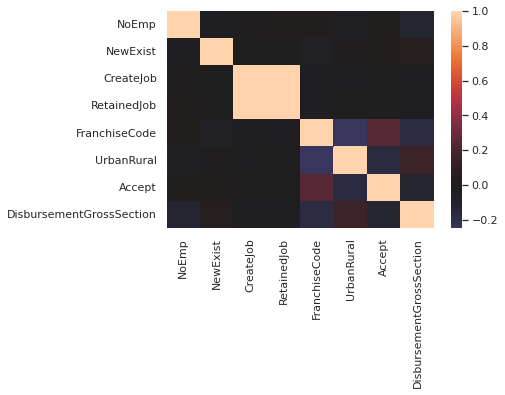

In [ ]:
# Correlation matrix
CorrInfo = pd.DataFrame(train_drop,columns=['City', 'Bank', 'BankState', 'ApprovalDateNumber', 'ApprovalFY', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'DisbursementDate', 'Accept',
       'DisbursementGrossSection'])


f, ax = plt.subplots()
corr = CorrInfo.corr()
ax = sns.heatmap(corr, center=0)

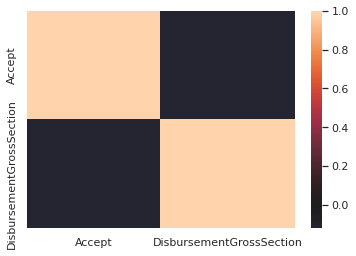

In [ ]:
# Correlation matrix
CorrInfo = pd.DataFrame(train_drop,columns=[
       'RevLineCr', 'LowDoc', 'DisbursementDate', 'Accept',
       'DisbursementGrossSection'])


f, ax = plt.subplots()
corr = CorrInfo.corr()
ax = sns.heatmap(corr, center=0)

In [ ]:
corr_df = train_drop.corr(method='pearson')
corr_df


,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,Accept,DisbursementGrossSection
NoEmp,1.000000,-0.043542,0.010765,0.023833,0.030442,-0.053013,0.020537,-0.116205
NewExist,-0.043542,1.000000,-0.004261,-0.012553,-0.058486,0.012706,0.027081,0.060322
CreateJob,0.010765,-0.004261,1.000000,0.995635,-0.023424,-0.021188,-0.004231,-0.022053
RetainedJob,0.023833,-0.012553,0.995635,1.000000,-0.028251,-0.014059,-0.004950,-0.026274
FranchiseCode,0.030442,-0.058486,-0.023424,-0.028251,1.000000,-0.250579,0.234700,-0.175358
UrbanRural,-0.053013,0.012706,-0.021188,-0.014059,-0.250579,1.000000,-0.163045,0.150872
Accept,0.020537,0.027081,-0.004231,-0.004950,0.234700,-0.163045,1.000000,-0.121129
DisbursementGrossSection,-0.116205,0.060322,-0.022053,-0.026274,-0.175358,0.150872,-0.121129,1.000000


In [ ]:
corr.Accept.abs().sort_values(ascending=False)

Accept                      1.000000
FranchiseCode               0.234700
UrbanRural                  0.163045
DisbursementGrossSection    0.121129
NewExist                    0.027081
NoEmp                       0.020537
RetainedJob                 0.004950
CreateJob                   0.004231
Name: Accept, dtype: float64

In [ ]:

vars = ['NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'Accept', 'DisbursementGrossSection']
train_values = train_drop[vars]

In [ ]:
train_values.head(10)

,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,Accept,DisbursementGrossSection
0,20,1.0,0,0,0,0,1,1
1,3,1.0,1,4,0,2,1,4
2,5,1.0,0,5,1,1,1,4
3,25,1.0,0,0,1,0,1,1
4,6,1.0,0,0,1,1,1,4
5,22,1.0,0,22,0,1,1,0
6,3,1.0,0,0,1,0,1,4
7,12,1.0,0,0,1,1,1,1
8,2,2.0,2,2,1,1,1,4
9,2,2.0,0,0,1,0,1,4


In [ ]:
#revlinecr low doc?? 

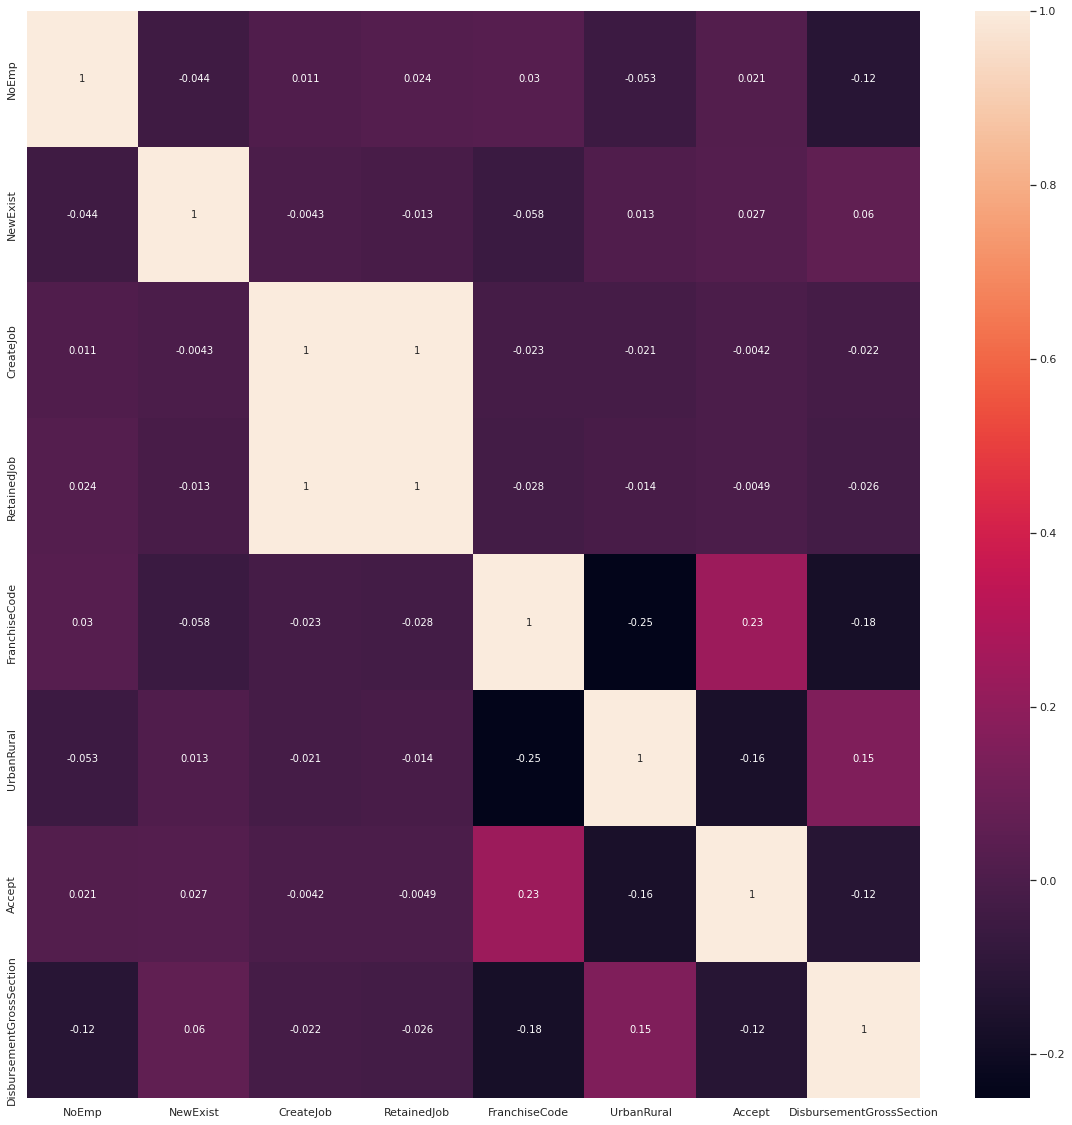

In [ ]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = train_drop.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train_drop[top_corr_features].corr(),annot=True)

#Modelos


In [ ]:

from itertools import *
import warnings

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC, LinearSVC, NuSVC

from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import Perceptron

from sklearn.linear_model import SGDClassifier

from sklearn import metrics

from sklearn.preprocessing import StandardScaler

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

##KNN

In [ ]:
df = train_values
features =  ['NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'DisbursementGrossSection']

In [ ]:

X_orig = df[features]
y = df['Accept']

RANDOM_STATE = 10

In [ ]:
cv = KFold(10, shuffle=True, random_state=RANDOM_STATE)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_orig, y, test_size=0.25, random_state=RANDOM_STATE)

model_kNN = KNeighborsClassifier(n_neighbors =10, leaf_size = 50 )

model_kNN.fit(X_train, y_train)

predicted_kNN = model_kNN.predict(X_test)
expected = y_test

print('precision: ', metrics.precision_score(expected, predicted_kNN))
print('recall:    ', metrics.recall_score(expected, predicted_kNN))
print('accuracy:  ', metrics.accuracy_score(expected, predicted_kNN))
print('f1:        ', metrics.f1_score(expected, predicted_kNN))

print('Clasification report')
print(metrics.classification_report(expected, predicted_kNN))

print('Confusion Matrix')
print(metrics.confusion_matrix(expected, predicted_kNN))

precision:  0.8265204386839482
recall:     0.9239628482972136
accuracy:   0.7840942854313162
f1:         0.8725295287100924
Clasification report
              precision    recall  f1-score   support

           0       0.43      0.23      0.29      2022
           1       0.83      0.92      0.87      8075

    accuracy                           0.78     10097
   macro avg       0.63      0.57      0.58     10097
weighted avg       0.75      0.78      0.76     10097

Confusion Matrix
[[ 456 1566]
 [ 614 7461]]


In [ ]:
param_grid_kNN = {
  #  'n_neighbors': [3, 5, 7, 10, 15, 20],
     'weights': ['uniform', 'distance'],
     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [1, 10, 30, 50],
#     'p': [1, 2]    
}

gs_kNN = GridSearchCV(model_kNN, param_grid_kNN, cv=cv, scoring=['precision', 'recall', 'accuracy', 'f1'], refit='f1', n_jobs=-1)

gs_kNN.fit(X_train, y_train)

print("Best score:", gs_kNN.best_score_)
print("Best params:", gs_kNN.best_params_)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best score: 0.8691933860353552
Best params: {'algorithm': 'ball_tree', 'leaf_size': 30, 'weights': 'uniform'}


##SVC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_orig, y, test_size=0.25, random_state=RANDOM_STATE)

model_svc = SVC(gamma='auto') # puesto para que no salgan los warnings

model_svc.fit(X_train, y_train)

predicted_svc = model_svc.predict(X_test)
expected = y_test

print('precision: ', metrics.precision_score(expected, predicted_svc))
print('recall:    ', metrics.recall_score(expected, predicted_svc))
print('accuracy:  ', metrics.accuracy_score(expected, predicted_svc))
print('f1:        ', metrics.f1_score(expected, predicted_svc))

print('Clasification report')
print(metrics.classification_report(expected, predicted_svc))

print('Confusion Matrix')
print(metrics.confusion_matrix(expected, predicted_svc))

precision:  0.8047848813831926
recall:     0.9914551083591331
accuracy:   0.8008319302763197
f1:         0.8884203517727348
Clasification report
              precision    recall  f1-score   support

           0       0.54      0.04      0.07      2022
           1       0.80      0.99      0.89      8075

    accuracy                           0.80     10097
   macro avg       0.67      0.52      0.48     10097
weighted avg       0.75      0.80      0.73     10097

Confusion Matrix
[[  80 1942]
 [  69 8006]]


In [ ]:
param_grid_svc = {
    'C': [0.1, 1, 5, 10, 50],
    #'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    #'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

gs_svc = GridSearchCV(model_svc, param_grid_svc, cv=cv, scoring=['precision', 'recall', 'accuracy', 'f1'], refit='accuracy', n_jobs=-1)

gs_svc.fit(X_train, y_train)

print("Best score:", gs_svc.best_score_)
print("Best params:", gs_svc.best_params_)

##Linear SVC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_orig, y, test_size=0.25, random_state=RANDOM_STATE)

model_linsvc = LinearSVC()

model_linsvc.fit(X_train, y_train)

predicted_linsvc = model_linsvc.predict(X_test)
expected = y_test

print('precision: ', metrics.precision_score(expected, predicted_linsvc))
print('recall:    ', metrics.recall_score(expected, predicted_linsvc))
print('accuracy:  ', metrics.accuracy_score(expected, predicted_linsvc))
print('f1:        ', metrics.f1_score(expected, predicted_linsvc))

print('Clasification report')
print(metrics.classification_report(expected, predicted_linsvc))

print('Confusion Matrix')
print(metrics.confusion_matrix(expected, predicted_linsvc))

In [ ]:
param_grid_linsvc = {
    #'C': [0.1, 1, 5, 10, 50],
    #'loss': ['hinge', 'squared_hinge'],
    'dual': [False],
    'penalty': ['l1', 'l2'],
    #'fit_intercept': [True, False],
    #'max_iter': [500, 1000, 5000]
}

gs_linsvc = GridSearchCV(model_linsvc, param_grid_linsvc, cv=cv, scoring=['precision', 'recall', 'accuracy', 'f1'], refit='accuracy', n_jobs=-1)

gs_linsvc.fit(X_train, y_train)

print("Best score:", gs_linsvc.best_score_)
print("Best params:", gs_linsvc.best_params_)

##Logistic Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_orig, y, test_size=0.25, random_state=RANDOM_STATE)

model_lr = LogisticRegression(solver='lbfgs') # puesto para que no salgan los warnings

model_lr.fit(X_train, y_train)

predicted_lr = model_lr.predict(X_test)
expected = y_test

print('precision: ', metrics.precision_score(expected, predicted_lr))
print('recall:    ', metrics.recall_score(expected, predicted_lr))
print('accuracy:  ', metrics.accuracy_score(expected, predicted_lr))
print('f1:        ', metrics.f1_score(expected, predicted_lr))

print('Clasification report')
print(metrics.classification_report(expected, predicted_lr))

print('Confusion Matrix')
print(metrics.confusion_matrix(expected, predicted_lr))

##Decision Tree Classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_orig, y, test_size=0.25, random_state=RANDOM_STATE)
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
model_tree = tree.DecisionTreeClassifier(splitter='random')
model_tree.fit(X_train, y_train)

predicted_tree = model_tree.predict(X_test)
expected = y_test

print('precision: ', metrics.precision_score(expected, predicted_tree))
print('recall:    ', metrics.recall_score(expected, predicted_tree))
print('accuracy:  ', metrics.accuracy_score(expected, predicted_tree))
print('f1:        ', metrics.f1_score(expected, predicted_tree))

print('Clasification report')
print(metrics.classification_report(expected, predicted_tree))

print('Confusion Matrix')
print(metrics.confusion_matrix(expected, predicted_tree))

In [ ]:
param_grid_decisionTree = [{'max_depth': np.arange(5, 7),
                     'criterion': ['gini', 'entropy'], 
                     'splitter': ['best', 'random'],
                     'class_weight':['balanced',{0:1,1:3},{0:2,1:5}],
                     'max_leaf_nodes': np.arange(12,16),
                     'random_state': [RANDOM_STATE],
                     #'max_features':['auto','sqrt', 'log2']
                    }]
gs_tree = GridSearchCV(model_tree, param_grid_decisionTree, cv=cv, scoring=['precision', 'recall', 'accuracy', 'f1'], refit='accuracy', n_jobs=-1)
gs_tree.fit(X_train, y_train)

print("Best score:", gs_tree.best_score_)
print("Best params:", gs_tree.best_params_)

##Decision Tree Regresor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_orig, y, test_size=0.25, random_state=RANDOM_STATE)
from sklearn.tree import DecisionTreeRegressor
adr = DecisionTreeRegressor()



adr.fit(X_train, y_train)



Y_pred = adr.predict(X_test)
expected = y_test
print('Precisión del modelo:')
print(adr.score(X_train, y_train))
#print('precision: ', metrics.precision_score(expected, Y_pred))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_orig, y, test_size=0.25, random_state=RANDOM_STATE)

model_TreeR = DecisionTreeRegressor()

model_TreeR.fit(X_train, y_train)

#predicted_TreeR = model_TreeR.predict(X_test)
#expected = y_test
print(model_TreeR.score(X_train, y_train))

In [ ]:

model_TreeR = DecisionTreeRegressor()
cross_val_score(model_TreeR, X_train, y_train, cv=cv)

In [ ]:
model_TreeR = DecisionTreeRegressor()
param_grid_decisionTreeR = [{
    #'max_depth': np.arange(0, 5),
                     'criterion': ['mse', 'mae','poisson', 'friedman_mse'], 
                     'splitter': ['best', 'random'],
                     'min_samples_split':np.arange(2, 5),
                     'min_samples_leaf':np.arange(1, 5),
                     'random_state': [RANDOM_STATE],
                     #'max_features':['auto','sqrt', 'log2']
  #  'criterion': 'mae', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 10, 'splitter': 'best'
                    }]

gs_treeR = GridSearchCV(model_TreeR, param_grid_decisionTreeR, cv=cv, scoring=['precision', 'recall', 'accuracy', 'f1'], refit='f1', n_jobs=-1)
#gs_treeR.fit(X_train, y_train)

#print("Best score:", gs_treeR.best_score_)
print("Best params:", gs_treeR.best_params_)

#Preparando resultados

In [ ]:
df_test = test_nolabel

In [ ]:
x_nolabel = df_test[features]
y_nolabel = model_TreeR.predict(x_nolabel)
id = df_test['id']

In [ ]:
dfsave = pd.DataFrame({'id': id, 'Accept': y_nolabel}, columns=["id", "Accept"])
dfsave.to_csv('submission.csv', index=False, header=True)